# First let's do some pre-processing on the p53 dataset

### The dataset can be downloaded from the UCI repository at https://archive.ics.uci.edu/ml/datasets/p53+Mutants.

We are using the old version of it just to test efficacy of the proposed anomaly detection method.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# In order to show all the outputs for the jupyter cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#p53_full_data = pd.read_csv('D:\Datasets\p53_old_2010\K8.data', header = None, na_values = '?')
p53_full_data = pd.read_csv('K8.data', header = None, na_values = '?')
p53_full_data.head(5)

0      1      2      3      4      5      6      7      8      9     ...   \
0 -0.161 -0.014  0.002 -0.036 -0.033 -0.093  0.025  0.005  0.000 -0.015  ...    
1 -0.158 -0.002 -0.012 -0.025 -0.012 -0.106  0.013  0.005  0.000 -0.002  ...    
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...    
3 -0.169 -0.025 -0.010 -0.041 -0.045 -0.069  0.038  0.014  0.008 -0.014  ...    
4 -0.183 -0.051 -0.023 -0.077 -0.092 -0.015  0.071  0.027  0.020 -0.019  ...    

    5400   5401   5402   5403   5404   5405   5406   5407      5408  5409  
0  0.013  0.021  0.020  0.016 -0.011  0.003  0.010 -0.007  inactive   NaN  
1 -0.008  0.007  0.015 -0.008 -0.011 -0.004  0.013  0.005  inactive   NaN  
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  inactive   NaN  
3  0.010  0.025  0.025  0.021 -0.012  0.006  0.016 -0.018  inactive   NaN  
4  0.012  0.050  0.038  0.051 -0.015  0.017  0.027 -0.049  inactive   NaN  

[5 rows x 5410 columns]

In [3]:
# Checking for columns that have only NaN values

null_columns = p53_full_data.columns[p53_full_data.isnull().all()]

print(p53_full_data[null_columns].isnull().sum()) 

5409    16772
dtype: int64


In [4]:
# Lets start getting rid of last column which contains just NaN values and lets map the activity
# of column 5408 to O and 1

activity_mapping = {'inactive': 0, 'active': 1}

p53_full_data = p53_full_data.drop(5409, axis = 1)
p53_full_data[5408] = p53_full_data[5408].map(activity_mapping)

p53_full_data.head()

0      1      2      3      4      5      6      7      8      9     ...   \
0 -0.161 -0.014  0.002 -0.036 -0.033 -0.093  0.025  0.005  0.000 -0.015  ...    
1 -0.158 -0.002 -0.012 -0.025 -0.012 -0.106  0.013  0.005  0.000 -0.002  ...    
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...    
3 -0.169 -0.025 -0.010 -0.041 -0.045 -0.069  0.038  0.014  0.008 -0.014  ...    
4 -0.183 -0.051 -0.023 -0.077 -0.092 -0.015  0.071  0.027  0.020 -0.019  ...    

    5399   5400   5401   5402   5403   5404   5405   5406   5407  5408  
0  0.006  0.013  0.021  0.020  0.016 -0.011  0.003  0.010 -0.007     0  
1  0.002 -0.008  0.007  0.015 -0.008 -0.011 -0.004  0.013  0.005     0  
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN     0  
3  0.019  0.010  0.025  0.025  0.021 -0.012  0.006  0.016 -0.018     0  
4  0.051  0.012  0.050  0.038  0.051 -0.015  0.017  0.027 -0.049     0  

[5 rows x 5409 columns]

In [5]:
# Counting the amount of positive and negative values
p53_full_data[5408].value_counts()

# Assigning the target column
p53_activity = p53_full_data[5408]

p53_full_data = p53_full_data.drop(5408, axis = 1)

p53_activity.head(20)

0    16629
1      143
Name: 5408, dtype: int64

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    1
18    1
19    1
Name: 5408, dtype: int64

In [6]:
# Counting how many rows have only NaN values

p53_full_data[0:16772].isnull().all(axis=1).value_counts()

null_rows = p53_full_data[0:16772].isnull().all(axis=1)

# Removing null rows

p53_full_data = p53_full_data[-null_rows]
p53_activity = p53_activity[-null_rows]

False    16715
True        57
dtype: int64

In [7]:
# Checking if there is any positive example with a NaN value

any_positive_row = p53_full_data[p53_activity == 1].index

p53_full_data.loc[any_positive_row].isnull().any(axis=1).value_counts()


False    143
dtype: int64

In [8]:
# As we checked, only negative examples have NaN values and as we have enough examples of this group, we will remove the ones
# that contain any value like that and try to create our first model without them

any_null_in_row = p53_full_data.loc[p53_full_data.index].isnull().any(axis=1)

# Removing null rows

p53_full_data = p53_full_data[-any_null_in_row]
p53_activity = p53_activity[-any_null_in_row]

# Checking if still there is any null value to data

p53_full_data.isnull().any(axis=1).value_counts()
p53_activity.isnull().any()

False    16592
dtype: int64

False

In [9]:
# Checking if samples match in row shape

p53_full_data.shape
p53_activity.shape

(16592, 5408)

(16592,)

In [10]:
'''
Normalize the full data (it is known that normalizing data before separating into training and testing splits may give the 
model some unfair information about the data that will be used to evaluate it)
'''

p53_normalized = (p53_full_data-p53_full_data.mean())/p53_full_data.std()

p53_normalized.head(10)

'\nNormalize the full data (it is known that normalizing data before separating into training and testing splits may give the \nmodel some unfair information about the data that will be used to evaluate it)\n'

0         1         2         3         4         5         6     \
0   0.098198 -0.025134  0.055496 -0.043957 -0.068577 -0.029658 -0.099040   
1   0.105426  0.008002 -0.001663 -0.001071  0.039004 -0.053765 -0.105066   
3   0.078925 -0.055510  0.006503 -0.063451 -0.130052  0.014846 -0.092511   
4   0.045196 -0.127305 -0.046573 -0.203808 -0.370829  0.114981 -0.075940   
5   0.115062  0.027332  0.002420  0.045715  0.090233 -0.070454 -0.109083   
6   0.124699  0.057707 -0.009828  0.096399  0.182445 -0.085288 -0.113602   
7   0.105426  0.019048 -0.030242 -0.012767  0.059495 -0.044493 -0.106070   
8   0.119881  0.038377 -0.013911  0.065209  0.120970 -0.079725 -0.112598   
9   0.071697 -0.063794  0.059578 -0.079046 -0.181281 -0.001843 -0.092009   
10  0.090971 -0.038941  0.002420 -0.047856 -0.058331 -0.007406 -0.097031   

        7         8         9       ...         5398      5399      5400  \
0  -0.049422 -0.046085 -0.073352    ...    -0.466720  0.152302  0.441501   
1  -0.049422 -0.046085 -0.035047    ...     0.242478 -0.039642 -0.673943   
3   0.021257 -0.008135 -0.070405    ...    -0.555370  0.776122  0.282152   
4   0.123350  0.048789 -0.085138    ...    -1.619168  2.311678  0.388385   
5  -0.072982 -0.060315 -0.023261    ...     3.256571 -0.663462  0.388385   
6  -0.104395 -0.069803  0.000311    ...     2.192774 -0.135615 -2.001852   
7  -0.049422 -0.041341 -0.020315    ...     4.054419  0.584177 -1.576921   
8  -0.104395 -0.079290 -0.017368    ...     0.597077 -0.807421 -0.727059   
9  -0.002303 -0.017623 -0.088085    ...    -4.544611  0.632164  1.397595   
10  0.005551 -0.012879 -0.058619    ...    -0.200771  0.440219  0.069686   

        5401      5402      5403      5404      5405      5406      5407  
0   0.395999  0.134609  0.429811  0.025340  0.103334 -0.149402 -0.278313  
1  -0.181446 -0.248208 -0.294900  0.025340 -0.352777  0.165270  0.244730  
3   0.560984  0.517426  0.580793 -0.080993  0.298810  0.479942 -0.757770  
4   1.592137  1.512751  1.486681 -0.399993  1.015556  1.633739 -2.108965  
5  -0.098954 -1.166970 -0.083526  1.407673 -0.483094 -0.254293  0.593426  
6  -1.790044  0.823680 -1.623536 -1.888660 -0.483094 -0.778746  1.029295  
7  -0.593907 -0.095081 -0.566666  0.238007 -0.157301  0.584833  0.549839  
8  -0.758892 -0.707589 -0.868629 -0.080993 -0.678570 -0.359184  0.942121  
9  -2.903689  2.431513  0.248634  0.663340  8.834599  9.080978 -0.627009  
10  0.313507  0.287736  0.278830 -0.080993  0.038175  0.270161 -0.365487  

[10 rows x 5408 columns]

In [11]:
# Feature selection
# We will be using correlation with target to select best features

features_correlation = list()

for column in range(len(p53_full_data.columns)):
    features_correlation.append(p53_normalized[column].corr(p53_activity))
    
features_correlation = pd.DataFrame(features_correlation)

def is_negative(x):
    if x < 0:
        return -x
    else: 
        return x

features_correlation = features_correlation.applymap(is_negative)

features_correlation = features_correlation.sort_values(by=0)
features_correlation.tail(10)

# 100 Best features

best_features = features_correlation.tail(100).index

p53_pre_processed = p53_normalized[best_features]

p53_pre_processed.shape

0
3574  0.328075
3572  0.336133
1138  0.340499
3573  0.345259
1160  0.350963
1152  0.351904
1149  0.359227
1151  0.377181
1150  0.382803
1159  0.388197

(16592, 100)

## PCA dimensionality reduction 

### To check how the data would behave with only 2 features

The plot is also good to check if clusters could be better separated with reduced dimensions

Text(0.5,1,'p53 activity outcomes')

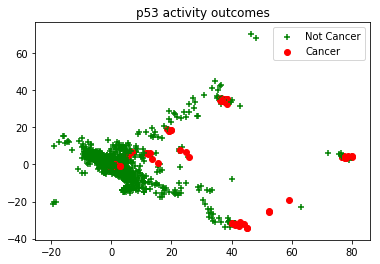

In [12]:
from sklearn.decomposition import PCA
import pylab as pl

pca = PCA(n_components=2).fit(p53_pre_processed)
pca_2d = pca.transform(p53_pre_processed)

index = p53_activity.index

for i in range(0, pca_2d.shape[0]):

    if p53_activity[index[i]] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c='g', marker='+')
    elif p53_activity[index[i]] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c='r', marker='o')

pl.legend([c1, c2], ['Not Cancer', 'Cancer'])   
pl.title('p53 activity outcomes')
pl.show()

## Feature Agglomeration for dimensionality reduction 

### To check how the data would behave with only 2 features (Same idea of the above PCA)

The plot is also good to check if clusters could be better separated with reduced dimensions

FeatureAgglomeration(affinity='euclidean', compute_full_tree='auto',
           connectivity=None, linkage='ward', memory=None, n_clusters=2,
           pooling_func=<function mean at 0x00000158F284F598>)

Text(0.5,1,'p53 activity outcomes')

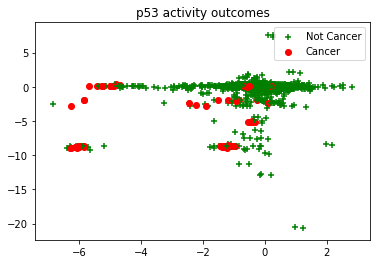

In [31]:
from sklearn import cluster

agglo = cluster.FeatureAgglomeration(n_clusters=2)
agglo.fit(p53_pre_processed)
reduced = agglo.transform(p53_pre_processed)

target = p53_activity.reset_index(drop = True)

for i in range(0, reduced.shape[0]):

    if target[i] == 0:
        c1 = pl.scatter(reduced[i,0],reduced[i,1], c='g', marker='+')
    elif target[i] == 1:
        c2 = pl.scatter(reduced[i,0],reduced[i,1], c='r', marker='o')

_ = pl.legend([c1, c2], ['Not Cancer', 'Cancer'])   
_ = pl.title('p53 activity outcomes')
_ = pl.show()

## Classification/Supervised approach

Here we are going to try to find the anomalies using SVM and Random Forests

In [35]:
# Making a more balanced dataset for classification

data_for_classifier = p53_pre_processed.loc[p53_activity == 1]
data_for_classifier = data_for_classifier.append(p53_pre_processed.loc[p53_activity == 0][:(2*len(data_for_classifier))])

target_for_classifier = p53_activity[data_for_classifier.index]

data_for_classifier.shape
target_for_classifier.shape

(429, 100)

(429,)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

[[57  1]
 [18 10]]
             precision    recall  f1-score   support

          0       0.76      0.98      0.86        58
          1       0.91      0.36      0.51        28

avg / total       0.81      0.78      0.75        86

Accuracy for testing data (SVM)
0.6699507389162561


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

[[53  5]
 [ 8 20]]
             precision    recall  f1-score   support

          0       0.87      0.91      0.89        58
          1       0.80      0.71      0.75        28

avg / total       0.85      0.85      0.85        86

Accuracy for testing data (Random Forest)
0.8140394088669951


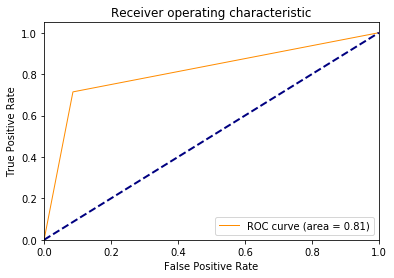

In [37]:
# Classification/Supervised approach

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_for_classifier, target_for_classifier, test_size=0.2, random_state=0)

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

clf = SVC(kernel='rbf', C=10, gamma=0.5)
clf.fit(x_train, y_train)

preds = clf.predict(x_test)
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))
print("Accuracy for testing data (SVM)")
print(roc_auc_score(y_test,preds))

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(x_train, y_train)
preds = random_forest.predict(x_test)

print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))
print("Accuracy for testing data (Random Forest)")
print(roc_auc_score(y_test,preds))

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

_ = plt.figure()
_ = plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
_ = plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
_ = plt.xlim([0.0, 1.0])
_ = plt.ylim([0.0, 1.05])
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('Receiver operating characteristic')
_ = plt.legend(loc="lower right")
_ = plt.show()

# Anomaly Detection with K-Means and Nearest Neighbor Strategy

Here we present the "Anomaly Detector" class which uses K-Means to detect the pattern presented in the non-anomaly class in order to use it to detect when anomaly samples appear.

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd
import numpy as np

class Anomaly_Detector:
    
    def __init__(self, benign_data, n_clusters = 10, n_neighbors = 3, outlier_rate = 2):
        self.benign_data = benign_data
        self.n_clusters = n_clusters
        self.n_neighbors = n_neighbors
        self.cluster_measurements = self.get_clusters()
        self.outlier_rate = outlier_rate
    
    def get_data(self):
        return self.benign_data
        
    def get_clusters(self):
        clusters = KMeans(self.n_clusters, random_state=0).fit(self.benign_data)
        cluster_centroids = pd.DataFrame(clusters.cluster_centers_)
        return cluster_centroids
    
    def get_metrics(self):
        non_anomaly_metrics = pd.DataFrame(np.transpose(self.distance_to_cluster(self.cluster_measurements, 
                                                                            self.benign_data)))
        return non_anomaly_metrics
    
    def distance_to_cluster(self, fixed_cluster, benign_points):

        # Reset index of rows and columns
        benign_points = benign_points.reset_index(drop = True)
        benign_points.columns = range(benign_data.shape[1])

        best_distances = np.zeros((1, self.n_neighbors))
        sample_out = []
        output = []
        distances = []

        for feature in range(fixed_cluster.shape[1]):

            for sample in range(benign_points.shape[0]):

                for cluster in range(fixed_cluster.shape[0]):                
                    distances.append(euclidean_distances(fixed_cluster[feature][cluster], benign_points[feature][sample]))
                    
                distances = np.abs(distances)
                distances.sort()
                best_distances = np.mean(distances[0:self.n_neighbors])

                sample_out.append(best_distances)
                distances = []

            output.append(sample_out)
            sample_out = []

        return output

    def get_anomalies(self, test_metrics):
        
        benign_metrics = self.get_metrics()
    
        # Reset index of rows and columns
        test_metrics = test_metrics.reset_index(drop = True)
        test_metrics.columns = range(test_metrics.shape[1])

        benign_mean = benign_metrics.mean()
        benign_std = benign_metrics.std()

        output = list()
        flag = 0

        for sample in range(test_metrics.shape[0]):

            for feature in range(self.benign_data.shape[1]):

                limit = benign_mean[feature] + benign_std[feature] * self.outlier_rate

                if(np.abs(test_metrics[feature][sample]) > limit):
                    flag = 1
                    break

            if flag == 1:
                output.append(1) # Outlier detected
            else:
                output.append(0) # Not an outlier

            flag = 0
                
        return output

In [15]:
# Separating malignant data for detection and benign data for training/validation
from sklearn.model_selection import train_test_split

benign_data, validation_data, _, _ = train_test_split(p53_pre_processed[p53_activity == 0], 
                                                      p53_activity[p53_activity == 0],
                                                      shuffle = True,
                                                      test_size=0.01, random_state=0)
malignant_data = p53_pre_processed[p53_activity == 1]

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Anomaly detection and metric checking

p53_mutants = Anomaly_Detector(benign_data[:200], n_clusters = 15, n_neighbors = 4, outlier_rate = 2)

outlier_mal = p53_mutants.get_anomalies(malignant_data)
outlier_val = p53_mutants.get_anomalies(validation_data)

labels_1 = np.array([1] * len(outlier_mal))
labels_0 = np.array([0] * len(outlier_val))

full_outlier = np.array(list(outlier_mal) + list(outlier_val))

full_label = np.array(list(labels_1) + list(labels_0))

print(confusion_matrix(full_label, full_outlier))
print(classification_report(full_label, full_outlier))
print(roc_auc_score(full_label, full_outlier))


[[145  20]
 [ 42 101]]
             precision    recall  f1-score   support

          0       0.78      0.88      0.82       165
          1       0.83      0.71      0.77       143

avg / total       0.80      0.80      0.80       308

0.7925407925407926


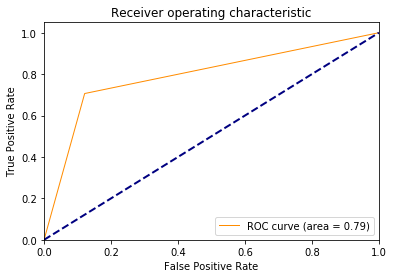

In [34]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(full_label, full_outlier)
roc_auc = auc(fpr, tpr)

_ = plt.figure()
_ = plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
_ = plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
_ = plt.xlim([0.0, 1.0])
_ = plt.ylim([0.0, 1.05])
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('Receiver operating characteristic')
_ = plt.legend(loc="lower right")
_ = plt.show()

### Checklist of things to be included in the next analysis:
- Grid search for parameters with the supervised approach
- Grid search for parameters with the clustering approahch
- Better description of clustering approach
- Ensemble for the supervised approach
- Normalization after separation of training/testing sets
- Different feature selection technique (Agglomerative Clustering, Tree based methods)
- Inclusion of other clustering techniques (Birch, MiniBatchKMeans, MeanShift)